# What Contributes to a Higher Salary, as a Success Factor?

## Introduction

In this study, I analyze the annual survey conducted by StackOverflow. This Survey was conducted in 2019. This study considers the high salary as a success facotr (**yet of course it's not the only factor**). But since other factors such as competence in problem solving is hard to measure from a survey, I considered high salary as the success factor. 

## I. Importing Necessary Libraries

In this section, I import all the necessary libraries to do my analysis. 
It's worth noting that `auxiliary_module` contains auxiliary functions (as the name suggests :) ), in order to keep this notebook nice and clean. 

In [2]:
import pandas as pd 
from pandas import DataFrame
from collections import defaultdict
import matplotlib.pyplot as plt
import auxiliary_module as aux

## II. Data Preperation

Before getting into the actual analysis, I need to perform some data preperation on the data set. First of all, I'm gonna drop some columns that are irrelevant to the study. for this, I'll use the function `drop_columns` defined in the `auxiliary_module` file. 

In [3]:
data_frame = pd.read_csv('survey_results_public.csv') # import the data set
deleted_columns = ['Gender' , 'Age' , 'Trans' , 'Ethnicity' , 'SurveyLength' , 'SurveyEase', 'Sexuality'] # columns to be deleted
prepared_data_frame = aux.drop_columns(data_frame, deleted_columns) # data frame after been prepared 

After deleting unnecessary columns, it's time to drop some NaNs! Since I'll be analyzing with respect to `ConvetedComp` (i.e., which is the column that has the annual salary conveted to USD), I'll remove all records that doesn't have that value. This can be accomplished as follows: 

In [4]:
print(str(prepared_data_frame.ConvertedComp.isnull().mean()))
prepared_data_frame = prepared_data_frame[prepared_data_frame['ConvertedComp'].notna()]
print("After")
prepared_data_frame.ConvertedComp.isnull().mean()

0.3719496416637602
After


0.0

For any data cleaning needed for a particular question, it'll be done on that particular cell. 

## III. The Questions 

After cleaning the data, it's time to do some analysis! 
The questions tackled in this study is: - 
1. What are the programming languages the developers community at StackOverflow used during 2019? 
2. Does considering programming as a hobby result in a higher salary?
3. Does the Level of Education result in a Higher Salary?
4. Does having more experience years Result in a Higher Salary?
5. Does Beginning in Programming Help in Getting Higher Salary ? 

### III.I What are the Programming Languages the Developers Community at StackOverflow Used During 2019 ?

To answer this question, First I need to extract all the programming languages from used in the survey. I'll store them in a list called `programming_languages` . 

In [5]:
programming_languages = ["Assembly", "Bash/Shell/PowerShell", 
                 "C", "C++", "C#",
                 "Clojure", "Dart", "Elixir",
                 "Erlang", "F#",
                 "Go", "HTML/CSS", "Java" , "JavaScript","Kotlin","Objective-C","PHP",
                 "Python","R" , "Ruby","Rust","Scala","SQL","Swift", "TypeScript" , "VBA","WebAssembly","Other(s)"]

After this, I'll plot a bar chart representing the percentages of these all languages. 

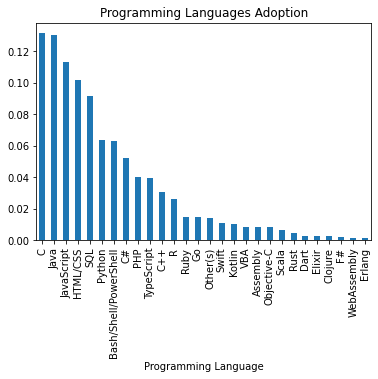

In [6]:
programming_languages_percentages = aux.clean_and_plot(programming_languages, prepared_data_frame,)

From the bar chart above, we can observe that C has the highest adoption rate form the developers by an approximation of 13.6%. Comming next is Java, which has an adoption rate of almost 13.5% . 

### III.II Does Considering Programming as a Hobby Result in a Higher Salary? 

In order to answer this question, I need first to figure out the percentages of wehteher developers consider programming as a hobby or not. This piece of information can be found by examining the `Hobbyist` column. 

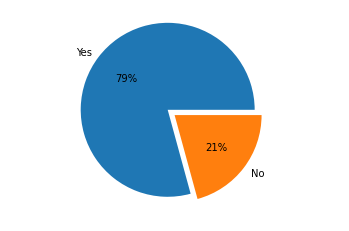

In [7]:
array = prepared_data_frame.Hobbyist.value_counts() # to examine the percentage of both choices 
plt.axis('equal')
plt.pie(array,labels=['Yes', 'No'], radius=1, autopct='%.0f%%', explode=[.1,0])
plt.show()

From the execution of the above code snippet, we found that **44238** do consider programming as a hobby. On the other hand, **11585** don't consider it as a hobby :( . 

Now, it's time to figure out the average salary of both categories. Using the below code snippet: 

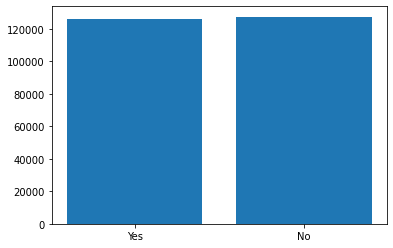

In [8]:
array = prepared_data_frame.groupby(['Hobbyist']).mean()['ConvertedComp']
plt.bar(['Yes', 'No'], array)
plt.show()

From the data above, we can observe that considering programming as a hobby may not have a big effect on the salary (as a form of success). 

### III.III Does the Level of Education Result in a Higher Salary?

Let's obeserve the educational degress of all the subjects. The code snippet below will do so. This can be accomplished by observing the `EdLevel` column. 

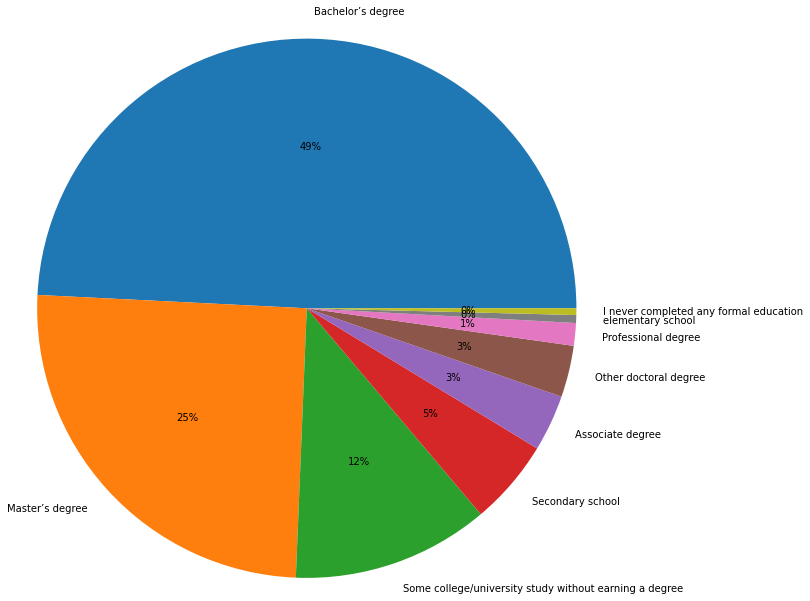

In [9]:
array = prepared_data_frame.EdLevel.value_counts() # to examine the percentage of both choices
plt.axis('equal')

plt.pie(array,labels=['Bachelor’s degree', 'Master’s degree','Some college/university study without earning a degree',
                      'Secondary school','Associate degree','Other doctoral degree','Professional degree','elementary school','I never completed any formal education',], radius=3.1, autopct='%.0f%%')
plt.show()

From the chart above, we observe that more than half of the subjects have at least a Bachelor degree. On the other hand, almost 25% possess a Master's degree. Now, let's examine how this may affect the salary. 

In [10]:
educational_level_data_frame = prepared_data_frame.groupby(['EdLevel']).mean()['ConvertedComp'] # store the result on a data frame
educational_level_data_frame.sort_values(ascending=False) # To display in a descending order 

EdLevel
Other doctoral degree (Ph.D, Ed.D., etc.)                                             171504.379046
I never completed any formal education                                                154087.313636
Associate degree                                                                      146191.275269
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              134966.131508
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           120712.385650
Some college/university study without earning a degree                                117587.731065
Primary/elementary school                                                              95072.546154
Professional degree (JD, MD, etc.)                                                     86490.193289
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     85330.023734
Name: ConvertedComp, dtype: float64

It seems that when a developer has a form of doctoral degree, s/he may have a higher chance in getting a higher salary. More importantly, we can observe that not possising any form of educational degree cannot prevent the person from succeeding in the software development territory. 

### III.IV Does having more experience years Result in a Higher Salary?

It's time to observe the experience years. We can do so by observing `YearsCode`. 

In [11]:
prepared_data_frame.YearsCode.value_counts().sort_values(ascending=False) # to examine the percentage of both choices 

10                    4896
5                     3930
6                     3847
8                     3700
7                     3495
15                    3016
4                     2723
20                    2714
12                    2666
9                     2403
3                     2129
11                    1723
14                    1636
13                    1574
18                    1466
2                     1315
16                    1246
25                    1183
17                    1086
30                    1040
22                     811
19                     788
35                     593
23                     567
21                     556
24                     496
1                      429
28                     335
40                     315
26                     310
27                     308
32                     294
33                     243
37                     241
38                     230
34                     221
36                     212
L

From the above chart, we can see that the majority of the developers have been coding for 5 years.

It's time to observe the relationship between the experience years and the salary. 

In [12]:
experience_years_data_frame = prepared_data_frame.groupby(['YearsCode']).mean()['ConvertedComp'] # store the result on a data frame
experience_years_data_frame.sort_values(ascending=False) # To display in a descending order 

YearsCode
43                    257491.673077
50                    238791.375000
49                    232410.083333
39                    226974.179487
More than 50 years    214187.625000
40                    207225.241270
28                    196185.626866
42                    195765.560000
38                    193303.452174
25                    189045.918005
46                    187708.727273
35                    187465.947723
45                    185179.178571
22                    183349.665845
31                    182876.675676
37                    181885.887967
34                    181072.063348
24                    179831.370968
26                    178840.703226
30                    177877.315385
23                    175622.693122
19                    171080.491117
33                    170233.320988
36                    167027.325472
20                    166656.826824
32                    160739.180272
47                    160123.062500
27                

As expected, the more experience years you have, the more salary you'll probably gain. 

### III.V Does Beginning Early in Programming Help in Getting Higher Salary ? 

Finally, let's see if the person starts programming from the very beginning of his/her life may result in getting a higher salary. This information can be figured out by looking into the `Age1stCode` column.

In [13]:
prepared_data_frame.Age1stCode.value_counts().sort_values(ascending=False) # to examine the percentage of both choices 

15                      5690
14                      5689
16                      5650
12                      5157
18                      4830
13                      4182
17                      3709
10                      3301
19                      2818
20                      2235
11                      2155
8                       1682
9                       1186
21                      1178
22                      1008
7                        869
23                       682
25                       554
24                       536
6                        532
26                       309
5                        280
27                       260
30                       212
Younger than 5 years     211
28                       210
29                       128
31                        78
32                        65
33                        57
35                        55
34                        52
40                        23
37                        17
36            

The majority of the devleopers in this survey have started in age from the range 12-18. Let's see how this may affect the salary. 

In [14]:
year_started_coding_data_frame = prepared_data_frame.groupby(['Age1stCode']).mean()['ConvertedComp'] # store the result on a data frame
year_started_coding_data_frame.sort_values(ascending=False) # To display in a descending order 

Age1stCode
49                      2.000000e+06
43                      4.444316e+05
Older than 85           4.057188e+05
36                      2.106065e+05
54                      2.000000e+05
39                      1.977140e+05
32                      1.842005e+05
40                      1.811548e+05
55                      1.800000e+05
8                       1.682694e+05
10                      1.628087e+05
6                       1.623666e+05
34                      1.602204e+05
5                       1.580219e+05
7                       1.507480e+05
25                      1.504446e+05
9                       1.480995e+05
28                      1.450541e+05
12                      1.427600e+05
31                      1.419279e+05
33                      1.418314e+05
26                      1.409649e+05
Younger than 5 years    1.387527e+05
11                      1.370125e+05
13                      1.369332e+05
30                      1.302771e+05
35                      1.2

Interstengly enough, the data doesn't show any correlation between the age of starting coding and the salary. 